# Lab 01: Correlation and Regression

Author: **N.J. de Winter** (*n.j.de.winter@vu.nl*)<br>
Assitant Professor Vrije Universiteit Amsterdam<br>
Statistics and Data Analysis Course

## Learning goals:

* Get famliar with Python through Jupyter
* Understand and apply tools to assess whether two variables are *correlated*
* Learn how to apply *regression* analysis to determine the shape of the *relationship* between two variables:
    * Simple linear regression (straight line relationship)
    * Polynomial regression (curved line relationship)
    * Exponental regression (exponentially growing or decaying relationship)

## Introduction
In this lab assignment, you will experiment with the tools in Python used to test correlation and regression.
We will start with simple correlation, linear and non-linear regression and work towards multiple and logistic regression in the following Lab assignment.

This notebook format makes it possible to include live code in between the text for this assignment. Note that you can also make the assignment by copying the code from the code blocks (marked by `In []`) into your own Python environment (such as Spyder) and run the code there (shortcut: __CTRL + ENTER__ on Windows/Linux and __CMD + ENTER__ on Mac). Working in this Jupyter notebook probably helps you to keep your code more organized.

We start each session of Python (and Jupyter) by importing the *packages* we need. We will also use the command `%matplotlib inline` to make it possible to add plots in between our text output. To do so, run the code in the cell below:

In [1]:
%matplotlib inline
import pandas as pd # The 'pandas' package helps us to import and manage data
import scipy.stats as stats # The 'scipy' package contains statistical formulas we will need
import statsmodels.formula.api as smf # The 'statsmodels' package contains the functions needed to do regressions
from matplotlib import pyplot as plt # The 'matplotlib' package contains tools needed to plot our data and results

Running the code above should not immediately yield a visible result, but it loads the functions you will need later into Python. If done correctly, you should see `In [1]` left of the cell above (`In [*]` means the kernel is still processing your code). Note also that the text behind the `#` sign is not part of the code, but lists comments that show what the code does. This is a very handy way to keep your code organized and make sure you remember later on what your code does!

Now we will load the dataset you will need for this exercise using the code below. Note that for this to work, you will need to place the datafile (`Lab01a.csv`) in the same folder as this notebook.

In [2]:
df = pd.read_csv('Lab01a.csv') # Load the data for this assignment into Python and in the Jupyter environment.
print(df)
df['Month_since_january_1979'].corr(df['Temperature_anomaly'], method = 'pearson')

            Date  Month_since_january_1979  Temperature_anomaly    pCO2
0     15/01/1979                       0.0                 0.08  336.56
1     15/02/1979                       1.0                -0.10  337.29
2     15/03/1979                       2.0                 0.19  337.88
3     15/04/1979                       3.0                 0.15  338.32
4     15/05/1979                       4.0                 0.03  338.26
...          ...                       ...                  ...     ...
1336         NaN                       NaN                  NaN     NaN
1337         NaN                       NaN                  NaN     NaN
1338         NaN                       NaN                  NaN     NaN
1339         NaN                       NaN                  NaN     NaN
1340         NaN                       NaN                  NaN     NaN

[1341 rows x 4 columns]


0.8553185819748022

If you run the code of this notebook in your own Python environment, you first need to specify the working directory and then load the data using a slightly different command. The statement `'<Direction to folder containing dataset>'` should be replaced with the directory of the folder on your PC, e.g.: `C:/MyName/Documents/Statistics_and_Data_Analysis/Lab01/`.

WARNING: The code below does not need to be run if you are working in Jupyter.

In [3]:
wdir = '<Direction to folder containing dataset>' # Set your working directory to the folder which contains the data
df = pd.read_csv(wdir + 'Lab01a.csv') # Load the data for this assignment from your own instance of Python.

OSError: [Errno 22] Invalid argument: '<Direction to folder containing dataset>Lab01a.csv'

Now let's visualize our dataset by showing the first couple of rows:

In [4]:
df.head()

,Date,Month_since_january_1979,Temperature_anomaly,pCO2
0,15/01/1979,0.0,0.08,336.56
1,15/02/1979,1.0,-0.10,337.29
2,15/03/1979,2.0,0.19,337.88
3,15/04/1979,3.0,0.15,338.32
4,15/05/1979,4.0,0.03,338.26


The dataset you are looking at contains information about the worldwide monthly temperature anomaly (in degrees C) of the period 1979-2022 relative to the mean global temperature during the period 1951-1980 (`Temperature_anomaly` column). It also lists the concentration of CO2 in the atmosphere measured monthly during this period (in parts per million by volume, or ppmV; `pCO2` column). The first column in your dataset (`Date`) lists the date in dd/mm/yyyy format and the second column numbers the months for easy plotting.

This dataset is obtained from the website [__Our World in Data__](https://ourworldindata.org/), which is an excellent source of up-to-date information about climate, food, economic development, biodiversity and other pressing societal issues.

__Question 1:__ Now that you have seen this dataset, can you think of a few questions we could solve by applying correlation and/or regression analyses on this data?

__Answer 1:__ We could check if there is a positive correlation between either temperature or CO2 with time to check if there is global warming. We could also investigate the relationship between CO2 and temperature.

## Part 1: Correlation

For starters, we might be interested in the correlation between atmospheric CO2 concentrations and global temperature.

__Question 2:__ Which metric can help us to determine whether there is a correlation between these two variables?

__Answer 2:__ We can look at Pearson's r

Let's try to calculate the Pearson's correlation coefficient between `pCO2` and the `Temperature_anomaly`. We can do thiss with the function `.corr` applied on the two columns in the dataset `df` as follows:

In [5]:
# Calculate Pearson's correlation between pCO2 and temperature anomaly
df['pCO2'].corr(df['Temperature_anomaly'], method = 'pearson')

0.8668794368709287

__Question 3:__ What do you think of this result? Is there a positive or a negative correlation between these two variables? Do you think the correlation is strong?

__Answer 3:__ The relationship is positive and quite strong

Have a good look at the code cell above which you used to calculate the Pearson's correlation coefficient to make sure you understand how it works and what it does. You will be calculating more correlation coefficients in this and later assignments!

Ïf you are not sure what is going on here, it can be helpful to look at the documentation for the function (`corr` in the pandas, or `pd` package). You can do that by using the `help()` function:

In [6]:
# Print the help page for the "corr"-function in the pandas library ("pd")
help(pd.DataFrame.corr)

Help on function corr in module pandas.core.frame:

corr(self, method: 'str | Callable[[np.ndarray, np.ndarray], float]' = 'pearson', min_periods: 'int' = 1) -> 'DataFrame'
    Compute pairwise correlation of columns, excluding NA/null values.
    
    Parameters
    ----------
    method : {'pearson', 'kendall', 'spearman'} or callable
        Method of correlation:
    
        * pearson : standard correlation coefficient
        * kendall : Kendall Tau correlation coefficient
        * spearman : Spearman rank correlation
        * callable: callable with input two 1d ndarrays
            and returning a float. Note that the returned matrix from corr
            will have 1 along the diagonals and will be symmetric
            regardless of the callable's behavior.
    min_periods : int, optional
        Minimum number of observations required per pair of columns
        to have a valid result. Currently only available for Pearson
        and Spearman correlation.
    
    Returns
 

That's a lot of information, and much of it may be hard to understand at this stage. Don't panic, the most important thing is that you know how to use this function and how to interpret the output.

__Exercise 1:__ To test yourself, you can apply the same function as above to see if there are positive or negative trends in `pCO2` and `Temperature_anomaly` with time in our dataset. In other words: You can test whether there are correlations between the `Month_since_january_1979` variable and either the `pCO2` and `Temperature_anomaly` variables in the dataset. Use the code cell below to do so and answer __Question 3__ for the results of these two correlations as well.

In [7]:
# Calculate Pearson's correlation between date (in months) and temperature anomaly
print('The correlation between temperature and time is', df['Month_since_january_1979'].corr(df['Temperature_anomaly'], method = 'pearson'))

# Calculate Pearson's correlation between date (in months) and pCO2
print('The correlation between pCO2 and time is', df['Month_since_january_1979'].corr(df['pCO2'], method = 'pearson'))


The correlation between temperature and time is 0.8553185819748022
The correlation between pCO2 and time is 0.9928063062698039


__Answer 3 (for the new correlations):__ All correlations are strong and positive

__Bonus exercise:__ If you payed close attention to the `help()` output for the `corr` function, you might have spotted that there are multiple ways (`methods`) to calculate correlation between variables. If you are curious, you can try out some of the other correlation methods, such as `kendall` and `spearman` on the pairs of variables in our dataset using the empty code cell below. Is the result very different? What does this tell you about the correlation we found?

In [8]:
# Bonus exercise: Try calculating correlation coefficients between variables in df using other methods
print('The Kendall correlation between pCO2 and temperature is', df['pCO2'].corr(df['Temperature_anomaly'], method = 'kendall'))
print('The Spearman correlation between pCO2 and temperature is', df['pCO2'].corr(df['Temperature_anomaly'], method = 'spearman'))


The Kendall correlation between pCO2 and temperature is 0.6811290551635875
The Spearman correlation between pCO2 and temperature is 0.8742712334485778


## Part 2: Simple linear regression

Now that we have discovered some correlations in our dataset, it is time to properly explore our dataset to verify if our correlations are not messed up by *outliers* or if the *form* of the relationship between our variables is not misleading us. We can do this by creating *scatter plots* of our data.

An example of a scatter plot showing the relationship between the temperature anomaly and time (in months) is produced by the code below. You can run it using the familiar shortcut (__CTRL + ENTER__ on Windows/Linux and __CMD + ENTER__ on Mac):

Text(0, 0.5, 'Temperature anomaly (in degrees C)')

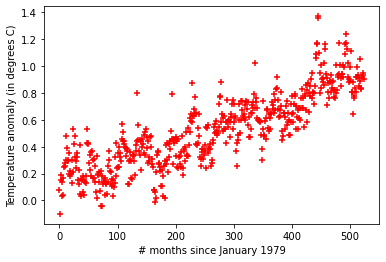

In [9]:
# Plot temperature anomaly against time
plt.scatter(df.Month_since_january_1979, df.Temperature_anomaly, color = 'red', marker = '+')
plt.xlabel('# months since January 1979')
plt.ylabel('Temperature anomaly (in degrees C)')

Carefully read the code in the cell above and verify that you understand what it does. You will do much more plotting like this in future assignments!

Remember, if you are confused about a function (such as `plt.scatter`), you can use the `help()` function to look up its documentation and find out what it does:

In [10]:
help(plt.scatter)

Help on function scatter in module matplotlib.pyplot:

scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, *, edgecolors=None, plotnonfinite=False, data=None, **kwargs)
    A scatter plot of *y* vs. *x* with varying marker size and/or color.
    
    Parameters
    ----------
    x, y : float or array-like, shape (n, )
        The data positions.
    
    s : float or array-like, shape (n, ), optional
        The marker size in points**2.
        Default is ``rcParams['lines.markersize'] ** 2``.
    
    c : array-like or list of colors or color, optional
        The marker colors. Possible values:
    
        - A scalar or sequence of n numbers to be mapped to colors using
          *cmap* and *norm*.
        - A 2D array in which the rows are RGB or RGBA.
        - A sequence of colors of length n.
        - A single color format string.
    
        Note that *c* should not be a single numeric RGB or RGBA sequence
    

__Exercise 2:__ To test whether you understand how to plot *scatter plots*, create plots of pCO2 vs time and pCO2 vs Temperature anomany in the two code cells below by modifying the code in the cell above used to plot Temperature anomaly vs time. Differentiate these scatter plots from each other by changing plot aesthetics such as the type of plotting symbol (`marker`), the color of the symbols (`col`) or the shading of the symbol (`alpha`). Use the help statement you ran in the previous code cell to guide your coding.

Text(0, 0.5, 'pCO2 (in ppmV)')

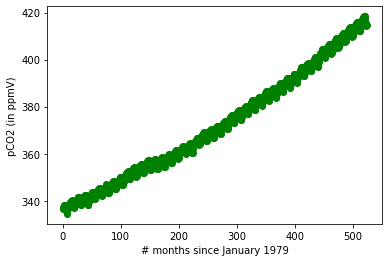

In [11]:
# Plot pCO2 against time
plt.scatter(df.Month_since_january_1979, df.pCO2, color = 'green', marker = 'o')
plt.xlabel('# months since January 1979')
plt.ylabel('pCO2 (in ppmV)')

Text(0, 0.5, 'Temperature anomaly (in degrees C)')

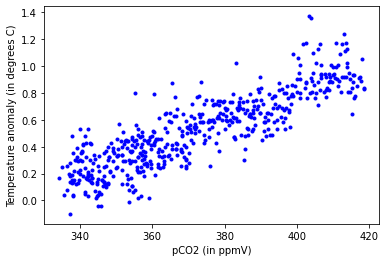

In [12]:
# Plot pCO2 against Temperature anomaly
plt.scatter(df.pCO2, df.Temperature_anomaly, color = 'blue', marker = '.')
plt.xlabel('pCO2 (in ppmV)')
plt.ylabel('Temperature anomaly (in degrees C)')

We will now explore the shape of the relationship between pCO2 and Temperature using our dataset. To do so, we can run a *simple linear regression* using the __ordinary least squares (ols)__ algorithm we have discussed in the lectures. We will use the built-in function `smf.ols()` from the `statsmodels` package we loaded at the beginning of the assignment to do this:

In [13]:
regression1 = smf.ols(formula = "df.Temperature_anomaly ~ df.pCO2", data = df).fit()

Another new function! Make sure you understand what this one does as well. You know by now how to search for its documentation if you feel lost.

The object `regression1` contains all the information about our regression model. Let's print the regression coefficients:

In [14]:
print('The regression coefficients are:\n', regression1.params)

The regression coefficients are:
 Intercept   -3.309034
df.pCO2      0.010288
dtype: float64


The `\n` in the code above is used to create a new line, very handy when printing output!

__Question 4:__ What is the meaning of the slope and intercept in this context?

__Answer 4:__ The slope is the warming (in degrees C) for each ppmV increase in pCO2. The intercept is the temperature anomaly for a pCO2 value of 0.

We can now use these coefficients to plot the regression line on top of our data:

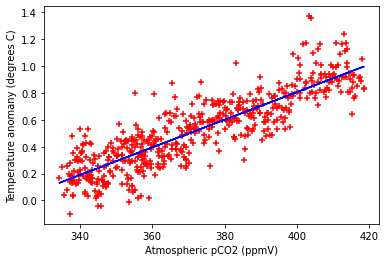

In [15]:
# Plot the result of simple linear regression between pCO2 and temperature
plt.scatter(df.pCO2, df.Temperature_anomaly, color = 'red', marker = '+')
plt.xlabel('Atmospheric pCO2 (ppmV)')
plt.ylabel('Temperature anomany (degrees C)')
plt.plot(df.pCO2, regression1.params[0] + regression1.params[1] * df.pCO2, color = 'blue')

__Qeustion 5:__ What do you think of this result? Does the regression line capture the relationship between the variables well?

__Answer 5:__ It seems to capture the trend reasonably well. The residuals look quite random.

To test our relationship, we can calculate the F-value and p-value of the regression. Python can do this for us with one simple command:

In [16]:
print(regression1.summary())

                              OLS Regression Results                              
Dep. Variable:     df.Temperature_anomaly   R-squared:                       0.751
Model:                                OLS   Adj. R-squared:                  0.751
Method:                     Least Squares   F-statistic:                     1581.
Date:                    Thu, 28 Sep 2023   Prob (F-statistic):          3.10e-160
Time:                            17:05:54   Log-Likelihood:                 294.95
No. Observations:                     525   AIC:                            -585.9
Df Residuals:                         523   BIC:                            -577.4
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   

OK, that's a lot of information... Python just calculated a whole bunch of statistical metrics for this regression. The ones we are interested in are the R<sup>2</sup> value (`R-squared`), the F-value (`F-statistic`) and the p-value (or 'probability': `Prob (F-statistic)`). You can also find the slope and intercept in this overview, as well as statistics on how certain we are about them (see `std err` values).

__Question 6:__ At a 95% significance level (alpha = 0.05), is this linear relationship statistically significant?

__Answer 6:__ p-value is 3.1 * 10<sup>-160</sup>, so this regression is certainly significant!

__Question 7:__ How much of the variance in our pCO2 vs Temperature_anomaly dataset is explained by this linear relationship?

__Answer 7:__ R<sup>2</sup> = 0.751, so about 75% of the variance is explained by the model.

__Question 8:__ Based on our dataset over the period 1979-2022 and our simple linear regression, how much global warming would you expect if pCO2 increases by 100 ppmV? Can you give an uncertainty for this estimate? (Hint: use the standard error, or `std err` on the relevant regression coefficient)

__Answer 8:__ The slope is 0.0103 degrees C / ppmV, so 100 ppmV should amount to a temperature increase of 1.03 degrees. The standard error on the slope is less than 0.001, so the error on this estimate is less than 0.1 degrees C.

__Question 9:__ The [__Intergovernmental Panel on Climate Change (IPCC)__](https://www.ipcc.ch/report/ar6/wg1/) considers various __Shared Socioeconomic Pathways__ in their projections for future climate. One of the more moderate scenarios (SSP2-4.5) predicts an atmospheric CO2 concentration of about 500 ppmV in the year 2100. Using the relationship you created in this exercise, what would you expect the temperature anomaly (global warming relative to the period 1951-1980) to be by the end of this century? Is this a realistic estimate? Can you see any problems with this way of projecting future climate?

__Answer 9:__ The pCO2 at the reference time (1951-1980) is about 340 ppmV. An increase to 500 ppmV with a slope of 0.0103 would therefore yield a temperature anomaly of 160 * 0.0103 = 1.65 degrees C. This is less than the models of SSP2-4.5 predict (their prediction is in the order of 2.5 degrees C). We are using a very short timespan to predict the future, and this extrapolation is therefore likely inaccurate.

## Part 3: Polynomial regression

To more thoroughly explore the trends in greenhouse gas concentrations and temperature on Earth, we will zoom out a bit and look at a dataset that goes further back in time.

__Exercise 3:__ Use the code cell below to load this new dataset, which is called `Lab01b.csv`. You can reuse the code you used at the beginning of the assignment to load `Lab01a.csv`.

To prevent confusion between these two datasets, you will need to assign this new dataset a different name from the old one (which was called `df`). We will (rather uncreatively) go with the name `df2` for the remainder of this exercise, but you can give it another name if you like. Just remember that you need to be consistent with your names, otherwise Python will not understand to which object or dataset you are referring to.

In [17]:
df2 = pd.read_csv('Lab01b.csv') # Load the second dataset for this assignment in the Jupyter environment.

This dataset contains annual average values of `pCO2` (atmospheric CO2 concentrations; in ppmV), `pCH4` (methane concentration; in ppb), `pN2O` (nitrous oxide concentration; in ppb) and `SST` (sea surface temperature anomalies; in degrees C relative to 1951-1980).

__Exercise 4:__ You can inspect this dataset using the `head()` or `print()` commands you used before. Do so using the code cell below.

In [18]:
# Inspect the new dataset
print(df2)

     Year        pCO2         pCH4        pN2O      SST
0    1850  284.001634   801.420000  275.400000 -0.30950
1    1851  287.128113          NaN         NaN -0.19337
2    1852         NaN          NaN         NaN -0.18339
3    1853         NaN          NaN         NaN -0.21098
4    1854  288.054438          NaN         NaN -0.26843
..    ...         ...          ...         ...      ...
168  2018  408.520833  1857.420833  330.914167  0.61641
169  2019  411.417500  1866.668333  331.886667  0.71702
170  2020  413.944167  1879.099167  333.038333  0.70991
171  2021  416.108333  1895.463333  334.322500  0.63219
172  2022  417.978000  1907.667500  335.455000      NaN

[173 rows x 5 columns]


__Question 10:__ What is striking about this dataset?

__Answer 10:__ The dataset contains "NaN" values.

CO2, CH4 and N2O are all greenhouse gases, so we expect them to covary with temperature.

__Exercise 5:__ Use the code cell below to calculate the Pearson's correlation coefficient between each of the greenhouse gases and temperature for the time period 1850-2022. You can use the `corr` function and the code you used in Part 1 of this assignment.

Do you think the presence of `NaN` values poses a problem? Hint: Check the `help()` entry for the `corr` function you printed above to check this. It is good to be aware of empty values in your dataset, as they can have a big impact on your data analysis!

In [19]:
# Calculate Pearson's correlation between pCO2 and temperature anomaly
print('The correlation between pCO2 and SST is', df2['pCO2'].corr(df2['SST'], method = 'pearson'))

# Calculate Pearson's correlation between pCH4 and temperature anomaly
print('The correlation between pCH4 and SST is', df2['pCH4'].corr(df2['SST'], method = 'pearson'))

# Calculate Pearson's correlation between pN2O and temperature anomaly
print('The correlation between pN2O and SST is', df2['pN2O'].corr(df2['SST'], method = 'pearson'))


The correlation between pCO2 and SST is 0.9258572816073056
The correlation between pCH4 and SST is 0.9027164444722533
The correlation between pN2O and SST is 0.9560131506685947


__Question 11:__ Which of these greenhouse gas concentrations show a positive correlation with sea surface temperature? Is there a strong correlation?

__Answer 11:__ All of them show a very strong correlation.

We will focus on the CO2 concentration now, and specifically on its trend through time.

__Exercise 6:__ Use your newly gained experience with Python (and the code examples above) to create a plot of pCO2 with time (`Year`) in the code cell below. 

Text(0, 0.5, 'pCO2 (in ppmV)')

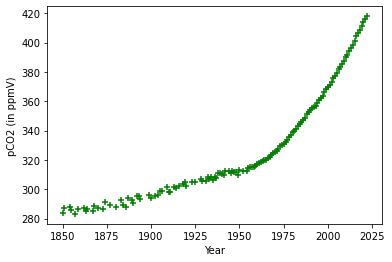

In [20]:
# Plot pCO2 vs time
plt.scatter(df2.Year, df2.pCO2, color = 'green', marker = '+')
plt.xlabel('Year')
plt.ylabel('pCO2 (in ppmV)')

__Exercise 7:__ Repeat the steps in Part 2 of this assignment to calculate a linear regression through the pCO2 time trend and plot the regression result on top of the pCO2 dataset. Use the code cell below.

Think carefully about how you name the new regression object! Remember that Python cannot remember two objects of the same name, and make sure you give a new object a name that allows you to remember what is stored in the object.

The regression coefficients are:
 Intercept   -1008.320818
df2.Year        0.685790
dtype: float64
                            OLS Regression Results                            
Dep. Variable:               df2.pCO2   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     613.5
Date:                Thu, 28 Sep 2023   Prob (F-statistic):           2.87e-51
Time:                        17:06:13   Log-Likelihood:                -551.53
No. Observations:                 133   AIC:                             1107.
Df Residuals:                     131   BIC:                             1113.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

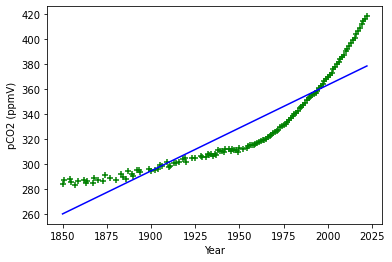

In [21]:
# Create linear regression between pCO2 and Year in dataset df2
regression2 = smf.ols(formula = "df2.pCO2 ~ df2.Year", data = df2).fit()

# Print the regression coefficients of the new linear regression
print('The regression coefficients are:\n', regression2.params)

# Plot pCO2 vs time with the linear regression line on top of the data
plt.scatter(df2.Year, df2.pCO2, color = 'green', marker = '+')
plt.xlabel('Year')
plt.ylabel('pCO2 (ppmV)')
plt.plot(df2.Year, regression2.params[0] + regression2.params[1] * df2.Year, color = 'blue')

# Print the regression summary to check the strength and the significance of the linear model
print(regression2.summary())

__Question 12:__ Do you think the linear regression approximates the form of the dataset well? What do the R<sup>2</sup>, F and p-value statistics tell you?

__Answer 12:__ No, the trend in pCO2 is clearly not linear, even though all the statistics look good. The scatter plot shows us that the residuals are not randomly distributed around the regression line. We need a better model.

The exercise above shows you how important it is to look at scatter plots of your data instead of blindly executing statistical tests. I think you would agree that we can think of better models to approximate the rise of pCO2 since the Industrial Revolution.

We will try a __polynomial regression__ to better approximate our pCO2 data. For this to work, we need to import some additional functions from the `sklearn` package, which we will need to preprocess our data for a polynomial regression. You can do so by running the code below.

In [22]:
from sklearn.preprocessing import PolynomialFeatures # Import functions needed for polynomial preprocessing

We can use the same OLS function as we used for linear regression to do a polynomial regression, but we need to pre-process our data first. For this we use the `PolynomialFeatures` function we just loaded. We will start by approximating the pCO2 data with a second degree polynomial function. Such a function contains a constant, a first order term and a second order term, yielding a function of the form:

$(y = a + b1 * x + b2 * x^2)$

Our OLS model will estimate values for `a`, `b1` and `b2`, but we will first transform our independent variable (in this case `Year`) to let Python know we will fit a polynomial function. Use the code below to do this, and inspect the resulting object.

In [23]:
x2 = PolynomialFeatures(2, include_bias = False).fit_transform(df2.Year.values.reshape(-1, 1)) # Transform the independent variable Year for a second degree polynomial regression

print(x2) # Inspect the resulting dataframe

[[1.850000e+03 3.422500e+06]
 [1.851000e+03 3.426201e+06]
 [1.852000e+03 3.429904e+06]
 [1.853000e+03 3.433609e+06]
 [1.854000e+03 3.437316e+06]
 [1.855000e+03 3.441025e+06]
 [1.856000e+03 3.444736e+06]
 [1.857000e+03 3.448449e+06]
 [1.858000e+03 3.452164e+06]
 [1.859000e+03 3.455881e+06]
 [1.860000e+03 3.459600e+06]
 [1.861000e+03 3.463321e+06]
 [1.862000e+03 3.467044e+06]
 [1.863000e+03 3.470769e+06]
 [1.864000e+03 3.474496e+06]
 [1.865000e+03 3.478225e+06]
 [1.866000e+03 3.481956e+06]
 [1.867000e+03 3.485689e+06]
 [1.868000e+03 3.489424e+06]
 [1.869000e+03 3.493161e+06]
 [1.870000e+03 3.496900e+06]
 [1.871000e+03 3.500641e+06]
 [1.872000e+03 3.504384e+06]
 [1.873000e+03 3.508129e+06]
 [1.874000e+03 3.511876e+06]
 [1.875000e+03 3.515625e+06]
 [1.876000e+03 3.519376e+06]
 [1.877000e+03 3.523129e+06]
 [1.878000e+03 3.526884e+06]
 [1.879000e+03 3.530641e+06]
 [1.880000e+03 3.534400e+06]
 [1.881000e+03 3.538161e+06]
 [1.882000e+03 3.541924e+06]
 [1.883000e+03 3.545689e+06]
 [1.884000e+03

Make sure you understand what happened here. You can always use the `help()` function to understand what `PolynomialFeatures` does, or Google it.

We will now perform the polynomial regression. This works much like the linear regression, but with the newly created `x2` as a set of independent variables:

In [24]:
polyreg1 = smf.ols('df2.pCO2 ~ x2', data = df2).fit() # Regression of second degree polynomial

print(polyreg1.summary())

                            OLS Regression Results                            
Dep. Variable:               df2.pCO2   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     2411.
Date:                Thu, 28 Sep 2023   Prob (F-statistic):          1.74e-103
Time:                        17:06:23   Log-Likelihood:                -425.00
No. Observations:                 133   AIC:                             856.0
Df Residuals:                     130   BIC:                             864.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.292e+04    878.990     26.075      0.0

__Question 13:__ How do the statistics of this polynomial model compare to those of the linear model you calculated before? Which model better describes the data? Which statistical metrics do you use to compare between them?

__Answer 13:__ The statistics are much better. The R<sup>2</sup> value is higher and the p-value is much lower. Even though both regressions are significant, the polynomial regression performs better.

Test the interpretations you made of the model output in the question above by plotting the result of the polynomial regression on top of the data. You can use the code in the cell below.

Note how similar this code is to the code you used to plot the linear regression results earlier in this exercise, and verify that you understand how this code works.

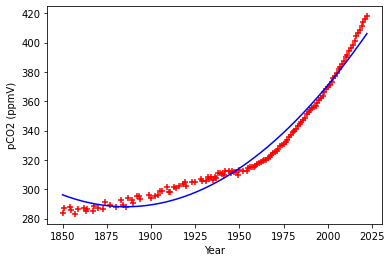

In [25]:
# Plot pCO2 vs time with the second degree polynomial regression line on top of the data
plt.scatter(df2.Year, df2.pCO2, color = 'red', marker = '+')
plt.xlabel('Year')
plt.ylabel('pCO2 (ppmV)')
plt.plot(df2.Year, polyreg1.params[0] + polyreg1.params[1] * df2.Year + polyreg1.params[2] * df2.Year ** 2, color = 'blue')

__Exercise 8:__ I think we all agree that this result is an improvement, but maybe we can do better. Repeat the process you went through to estimate and plot the second order polynomial regression through the pCO2 dataset, but now create third and fourth order polynomials. Print the statistics for these models and plot them all together on top of the pCO2 data. Again: watch out how you name your objects and think carefully before you copy and paste code. Use the code cell below:

                            OLS Regression Results                            
Dep. Variable:               df2.pCO2   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                 1.224e+04
Date:                Thu, 28 Sep 2023   Prob (F-statistic):          3.63e-158
Time:                        17:06:28   Log-Likelihood:                -291.04
No. Observations:                 133   AIC:                             590.1
Df Residuals:                     129   BIC:                             601.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.897e+05   1.43e+04    -27.336      0.0

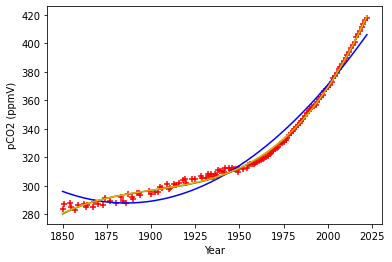

In [26]:
# Transform the independent variable Year for a third and fourth degree polynomial regression
x3 = PolynomialFeatures(3, include_bias = False).fit_transform(df2.Year.values.reshape(-1, 1))
x4 = PolynomialFeatures(4, include_bias = False).fit_transform(df2.Year.values.reshape(-1, 1))

polyreg2 = smf.ols('df2.pCO2 ~ x3', data = df2).fit() # Regression of third degree polynomial
polyreg3 = smf.ols('df2.pCO2 ~ x4', data = df2).fit() # Regression of fourth degree polynomial

# Print summaries of third and fourth degree polynomial models
print(polyreg2.summary())
print(polyreg3.summary())

# Plot all polynomial models on the data in one plot
plt.scatter(df2.Year, df2.pCO2, color = 'red', marker = '+')
plt.xlabel('Year')
plt.ylabel('pCO2 (ppmV)')
plt.plot(df2.Year, polyreg1.params[0] + polyreg1.params[1] * df2.Year + polyreg1.params[2] * df2.Year ** 2, color = 'blue') # 2nd degree polynomial
plt.plot(df2.Year, polyreg2.params[0] + polyreg2.params[1] * df2.Year + polyreg2.params[2] * df2.Year ** 2 + polyreg2.params[3] * df2.Year ** 3, color = 'green') # 3rd degree polynomial
plt.plot(df2.Year, polyreg3.params[0] + polyreg3.params[1] * df2.Year + polyreg3.params[2] * df2.Year ** 2 + polyreg3.params[3] * df2.Year ** 3 + polyreg3.params[4] * df2.Year ** 4, color = 'orange') # 4th degree polynomial

__Question 14:__ What do you think of the result? Do the added polynomial terms improve the model? If so, do you think adding even more terms would be useful here? Can you find an optimum number of polynomial terms to accurately describe the shape of the pCO2 data while preventing overfitting?

__Answer 14:__ The third order model is a clear improvement, but the fourth order model does not improve much over the third order polynomial. I would therefore choose the third order polynomial as the model of choice, as it captures the shape of the data nicely without overfitting. Models with even more terms are unlikely to perform better and will likely overfit the data.

__Question 15:__ After what we have learned from looking at a longer timeseries of pCO2, are you still equally confident about your answers to __Question 8 & 9__? If not, what changed your mind?

__Answer 15:__ No, looking at a longer time series and fitting a non-linear model shows that the period of 1979-2022 is not really representative of the longer pCO2 trend. We should therefore be careful in extrapolating relationships based on this period.

## Part 4: Exponential regression

We will now briefly look at the pCO2 trend since 1850 using another type of regression model: exponential regression. We have discussed this type of regression in the lectures, but as a reminder you will find the general function for exponential regression models below:

$(y = c * e^{bx})$

However, we need to transform this function into its linear form to be able to use OLS. We can do this by taking the natural logarithm on both sides of the equation:

$(log{(y)} = log{(c)} + b * x)$

Now this is just a simple linear regression of the form $(y = a + bx)$, but with $y$ replaced by $log{(y)}$ and $a$ by $log{(c)}$. To use it, we first need to transform our dependent variable (pCO2) to its natural logarithm. For that, we need to import the `log()` function from the `numpy` package. After the transformation of our pCO2 variable, we can apply the OLS function to perform the linear regression. This code should look quite familiar to you now.

In [27]:
import numpy as np # Import the numpy package that contains the log-function

logCO2 = np.log(df2.pCO2) # Create a new variable that is the natural logarithm of pCO2

expreg1 = smf.ols(formula = "logCO2 ~ df2.Year", data = df2).fit() # Perform the 'exponential' regression in its linearized form

print(expreg1.summary()) # Print the regression summary

                            OLS Regression Results                            
Dep. Variable:                 logCO2   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     788.1
Date:                Thu, 28 Sep 2023   Prob (F-statistic):           2.86e-57
Time:                        17:06:39   Log-Likelihood:                 238.00
No. Observations:                 133   AIC:                            -472.0
Df Residuals:                     131   BIC:                            -466.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.7859      0.143     12.526      0.0

__Question 16:__ Based on the statistics of the regression model, how well did the exponential regression perform? How does it compare to the linear and polynomial regressions you created before?

__Answer 16:__ The exponential model performs slightly better than the linear model, but worse than the polynomial models.

__Exercise 9:__ From the regression results, you can now calculate the parameters of the exponental function ($(y = c * e^{bx})$). Use the code cell below to calculate the parameters and plot the result of the exponential regression on top of the pCO2 data.

Tip: The `numpy` package contains the function `np.exp` which can be used to calculate e<sup>x</sup> to convert back from the natural logarithm

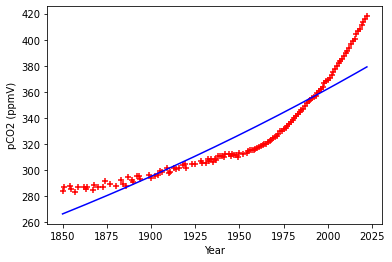

In [28]:
c = np.exp(expreg1.params[0]) # Calculate the parameter c by taking the natural exponent

# Plot the exponential model on top of the pCO2 data
plt.scatter(df2.Year, df2.pCO2, color = 'red', marker = '+')
plt.xlabel('Year')
plt.ylabel('pCO2 (ppmV)')
plt.plot(df2.Year, c * np.exp(expreg1.params[1] * df2.Year), color = 'blue')

__Question 17:__ What do you think of the result? Can you think of a problem with our exponential model when trying to fit it to this type of data?

__Answer 17:__ The model does not really fit very well. The problem is that the exponential model has to go through the origin, and our data does not necessarily contain the value (0, 0). In other words, it is not certain that the Year 0 will have a pCO2 value of 0 (in fact, this is definitely not the case!).

__Bonus exercise:__ We can probably make our exponential model fit better by modifying our variables `Year` and `pCO2`to relative values. We can do this by subtracting the minimum value in the dataset from all datapoints for both parameters. The function `np.min()` can help us with that:

In [29]:
# Create relative pCO2 and Year variables
pCO2min = np.min(df2.pCO2) # find the minimum pCO2 value
Yearmin = np.min(df2.Year) # find the minimum Year (1850)

# Print the results
print('The minimum pCO2 value is', pCO2min, 'ppmV')
print('The starting Year is', Yearmin, 'AD')

pCO2min = 280 # Round the minimum pCO2 down to prevent zeroes in the dataset (log(0) has no solution)

pCO2rel = df2.pCO2 - pCO2min
Yearrel = df2.Year - Yearmin

The minimum pCO2 value is 283.1621007 ppmV
The starting Year is 1850 AD


Now repeat the exponential regression you performed above with these modified variables and assess whether it performs better.

                            OLS Regression Results                            
Dep. Variable:                 logCO2   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     788.1
Date:                Thu, 28 Sep 2023   Prob (F-statistic):           2.86e-57
Time:                        17:06:46   Log-Likelihood:                 238.00
No. Observations:                 133   AIC:                            -472.0
Df Residuals:                     131   BIC:                            -466.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.7859      0.143     12.526      0.0

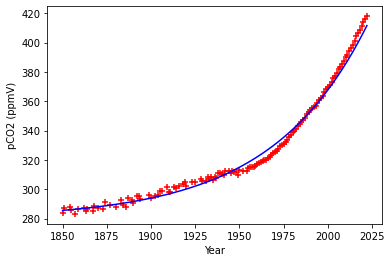

In [30]:
logCO2_rel = np.log(pCO2rel) # Create a new variable that is the natural logarithm of the modified pCO2 variable

expreg2 = smf.ols(formula = "logCO2_rel ~ Yearrel", data = df2).fit() # Perform the 'exponential' regression in its linearized form

print(expreg1.summary()) # Print the regression summary

c2 = np.exp(expreg2.params[0]) # Calculate the parameter c by taking the natural exponent

# Plot the exponential model on top of the pCO2 data
plt.scatter(df2.Year, df2.pCO2, color = 'red', marker = '+')
plt.xlabel('Year')
plt.ylabel('pCO2 (ppmV)')
plt.plot((Yearrel + Yearmin), c2 * np.exp(expreg2.params[1] * Yearrel) + pCO2min, color = 'blue')
# When plotting this exponential model on the same axes as the data, we need to be careful that we add the minimum values back up.

This bonus exercise shows us that the exponential fit is actually quite good when we move the origin to the beginning of the dataset (1850, 280). However, there are still features in the data which the model does not explain, and the polynomial models capture these features better.